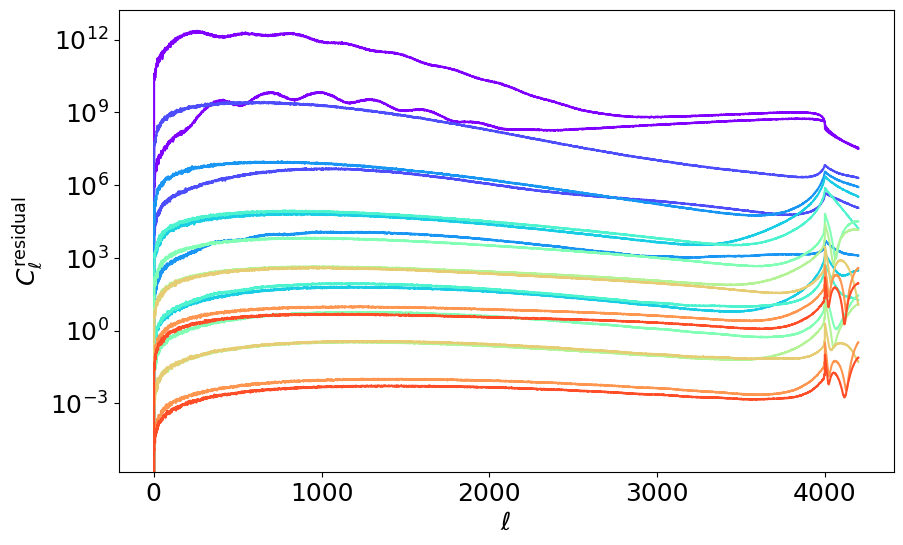

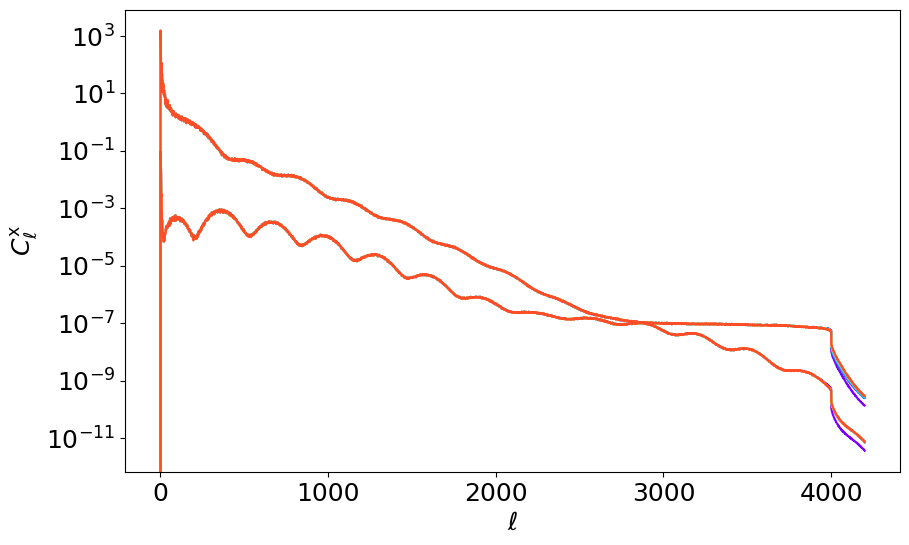

(2048, 4200) [00:01:55] (9, 0.00000007)
INFO:: 05-27 13:33:11:: delensalot.core.iterator.cs_iterator.calc_gradlik - caching wflm_p_it2
INFO:: 05-27 13:33:23:: delensalot.core.iterator.cs_iterator.calc_gradlik - get_qlms calculation done; (12 secs)
loading plm 2
 [00:00:01]  Exec. time for descent direction calculationtor.prt_time - 
INFO:: 05-27 13:33:25:: delensalot.core.handler.run - 0, simidx 0 done with it 3
INFO:: 05-27 13:33:25:: delensalot.sims.sims_lib.purgecache - sims_lib: purging cachers to release memory
INFO:: 05-27 13:33:25:: delensalot.core.handler.run - 0, task calc_blt started, jobs: [0]
loading plm 1
loading plm 2
loading plm 3
INFO:: 05-27 13:33:50:: delensalot.sims.sims_lib.purgecache - sims_lib: purging cachers to release memory
INFO:: 05-27 13:33:50:: delensalot.config.handler.run - running job analyse_phi


/home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/delensalot/core/handler.py:1619: RuntimeWarning: invalid value encountered in true_divide
  WFemps[it] = alm2cl(plm_in, plm_est[it], None, None, None)/alm2cl(plm_in, plm_in, None, None, None)
/home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/delensalot/core/handler.py:1586: RuntimeWarning: invalid value encountered in true_divide
  val = alm2cl(plm_est, plm_in, None, None, None) / alm2cl(plm_in, plm_in, None, None, None)/WFemps[it]
/home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/delensalot/core/handler.py:1600: RuntimeWarning: invalid value encountered in true_divide
  val = alm2cl(plm_est, plm_in, None, None, None)**2/(alm2cl(plm_est, plm_est, None, None, None)*alm2cl(plm_in, plm_in, None, None, None))


INFO:: 05-27 13:33:57:: delensalot.config.handler.run - running job delens
Calculating coupling matrix...
 [00:00:00]  ---------> 93%
INFO:: 05-27 13:34:17:: delensalot.core.handler.delens - got inbut Blms
INFO:: 05-27 13:34:18:: delensalot.core.handler.delens - starting mask nlevel inf
INFO:: 05-27 13:34:26:: delensalot.core.handler.delens - Finished MAP delensing for simidx 0, iteration 2
INFO:: 05-27 13:34:26:: delensalot.config.handler.run - running job analyse_phi
INFO:: 05-27 13:34:26:: delensalot.config.handler.store - /home/nisl/delensalot/first_steps/notebooks/raw.py
/home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/delensalot_temp/analysis/my_first_dlensalot_analysis_fullsky_lminB200 raw.py
config file /home/nisl/Programs/miniconda3/envs/lensquest/lib/python3.7/site-packages/delensalot_temp/analysis/my_first_dlensalot_analysis_fullsky_lminB200/raw.py already exist. Checking differences.
config file comparison done. No conflicts found.
Matching config f

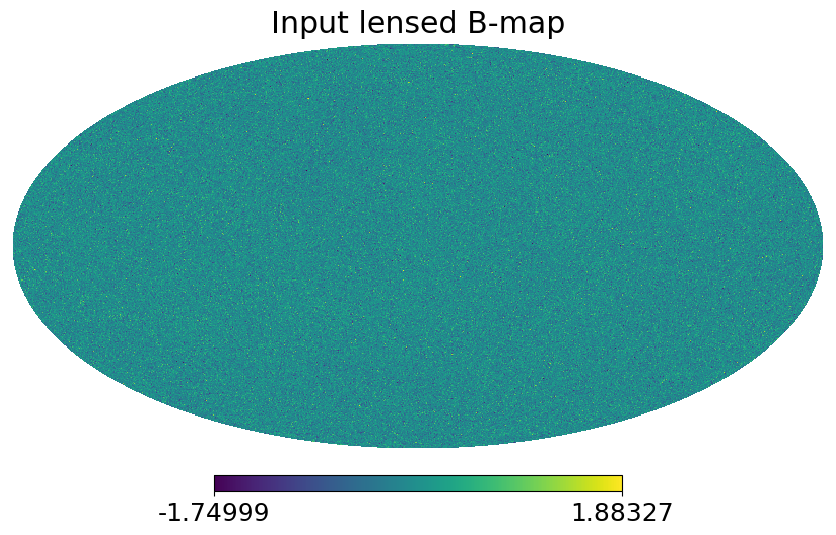

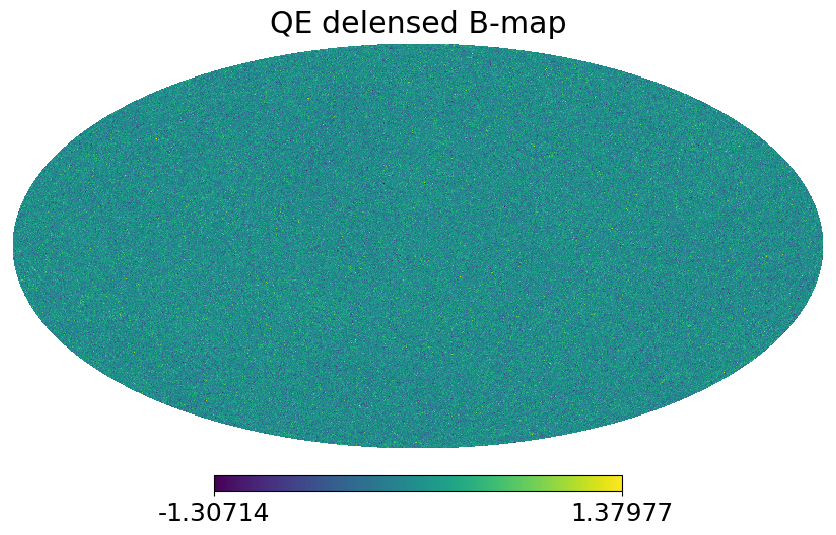

Text(0, 0.5, '$C_\\ell [\\mu $$\\rm{K}^2$]')

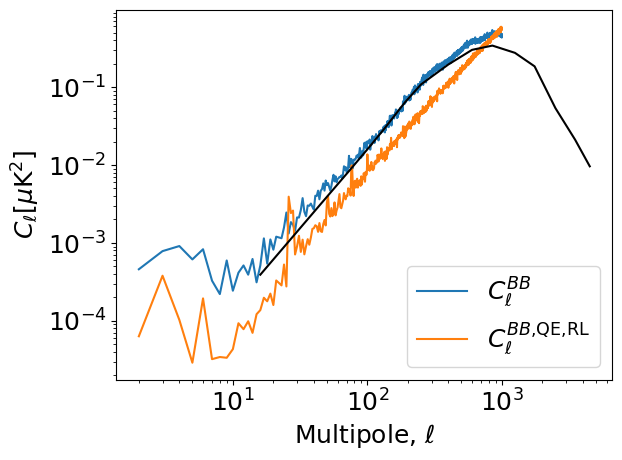

In [7]:
from IPython.display import clear_output
from datetime import datetime

import os
from os.path import join as opj

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import delensalot
from delensalot.run import run
from delensalot import utils as dutils
from delensalot.utility.plot_helper import bandpass_alms, movavg
from delensalot.utility.utils_hp import alm_copy, almxfl

planck_cmap = ListedColormap(np.loadtxt(os.path.dirname(delensalot.__file__)+"/data/Planck_Parchment_RGB.txt")/255.)
planck_cmap.set_bad("gray")
planck_cmap.set_under("white") 

delensalot_path = os.path.dirname(delensalot.__file__)
os.system("rm -rf %s_temp/*"%delensalot_path)

fn = opj(os.getcwd(), 'raw.py')


delensalot_runner = run(config_fn=fn, job_id='delens', verbose=True)
delensalot_runner.run()
ana_mwe = delensalot_runner.init_job()


input_blensing = almxfl(alm_copy(ana_mwe.simulationdata.get_sim_sky(ana_mwe.simidxs[0], space='alm', spin=0, field='polarization')[1], None, *ana_mwe.lm_max_blt), ana_mwe.ttebl['e'], ana_mwe.lm_max_blt[0], inplace=False) 
blens_residual_QE = ana_mwe.get_residualblens(ana_mwe.simidxs[0], 0)

clbb = ana_mwe.read_data()

hp.mollview(hp.alm2map(input_blensing, nside=256), title='Input lensed B-map')
hp.mollview(hp.alm2map(blens_residual_QE, nside=256), title='QE delensed B-map')

plt.show()

input_cl = hp.alm2cl(input_blensing, lmax_out=1000)
resid_cl = hp.alm2cl(blens_residual_QE, lmax=1000, lmax_out=1000)

ell = np.arange(len(input_cl))[2:]


plt.loglog(ell, ell*(ell+1)*input_cl[2:], label=r'$C_\ell^{BB}$')
plt.loglog(ell, ell*(ell+1)*resid_cl[2:], label=r'$C_\ell^{BB{,}{\rm QE{,}RL}}$')

plt.loglog(ana_mwe.edges_center, ana_mwe.edges_center*(ana_mwe.edges_center)*ana_mwe.ct[1:], color='black')

plt.legend(loc='lower right')
# plt.xlim(0,210)
# plt.ylim(1e-7,1e-5)
plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')


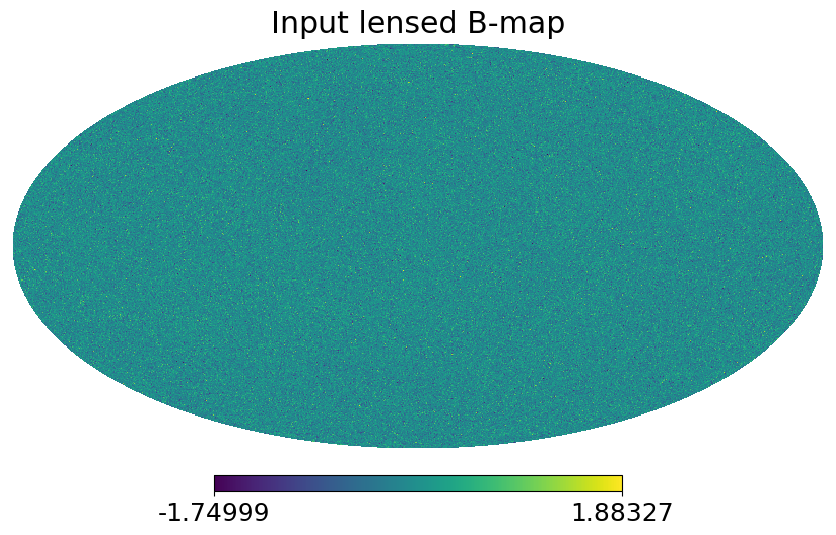

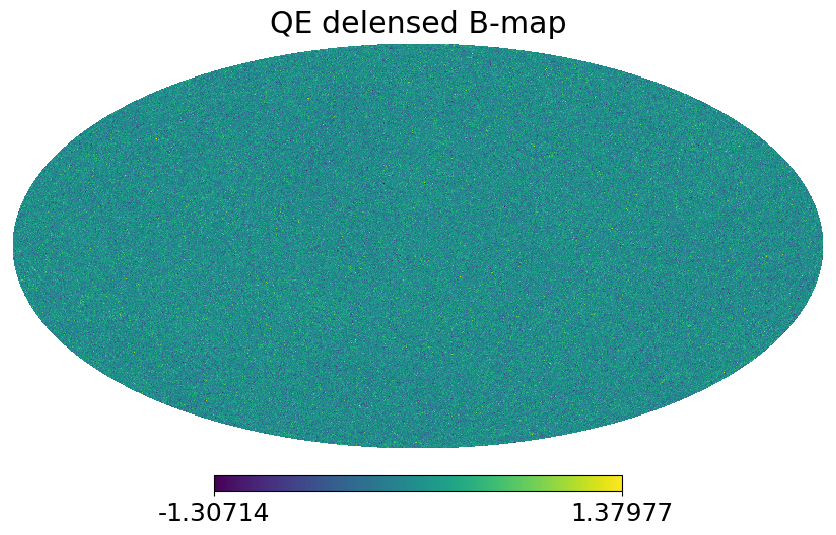

Text(0, 0.5, '$C_\\ell [\\mu $$\\rm{K}^2$]')

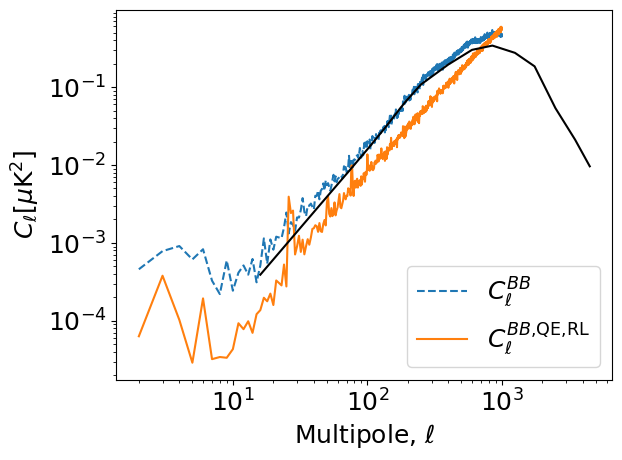

In [9]:
input_blensing = almxfl(alm_copy(ana_mwe.simulationdata.get_sim_sky(ana_mwe.simidxs[0], space='alm', spin=0, field='polarization')[1], None, *ana_mwe.lm_max_blt), ana_mwe.ttebl['e'], ana_mwe.lm_max_blt[0], inplace=False) 
blens_residual_QE = ana_mwe.get_residualblens(ana_mwe.simidxs[0], 0)

clbb = ana_mwe.read_data()

hp.mollview(hp.alm2map(input_blensing, nside=256), title='Input lensed B-map')
hp.mollview(hp.alm2map(blens_residual_QE, nside=256), title='QE delensed B-map')

plt.show()

input_cl = hp.alm2cl(input_blensing, lmax_out=1000)
resid_cl = hp.alm2cl(blens_residual_QE, lmax=1000, lmax_out=1000)

ell = np.arange(len(input_cl))[2:]


plt.loglog(ell, ell*(ell+1)*input_cl[2:], label=r'$C_\ell^{BB}$', linestyle='--')
plt.loglog(ell, ell*(ell+1)*resid_cl[2:], label=r'$C_\ell^{BB{,}{\rm QE{,}RL}}$')

plt.loglog(ana_mwe.edges_center, ana_mwe.edges_center*(ana_mwe.edges_center)*ana_mwe.ct[1:], color='black')

plt.legend(loc='lower right')
# plt.xlim(0,210)
# plt.ylim(1e-7,1e-5)
plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')

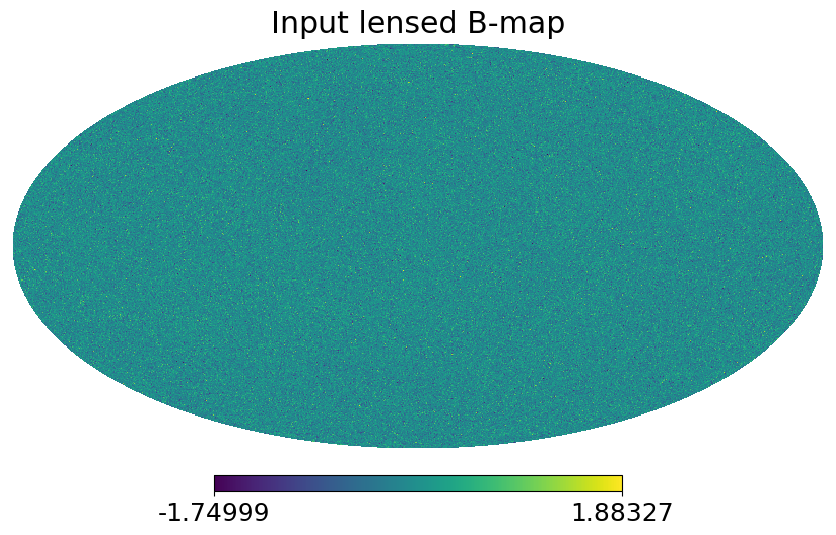

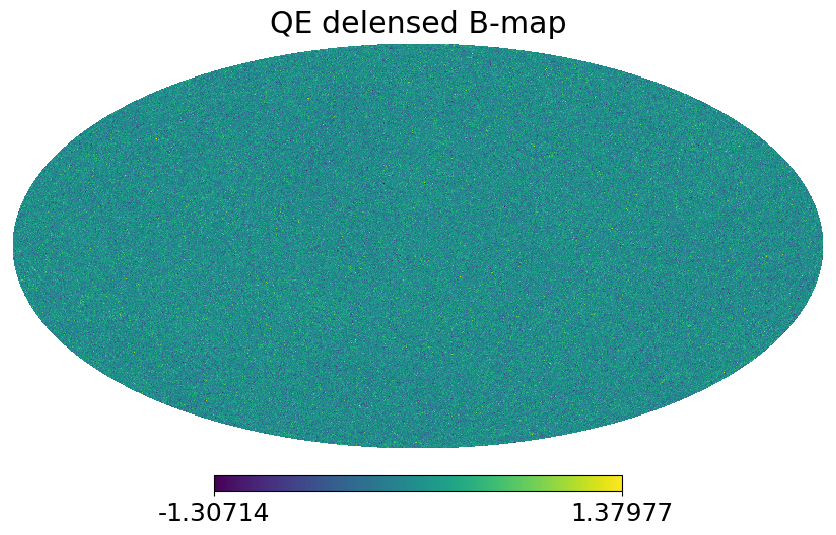

Text(0, 0.5, '$C_\\ell [\\mu $$\\rm{K}^2$]')

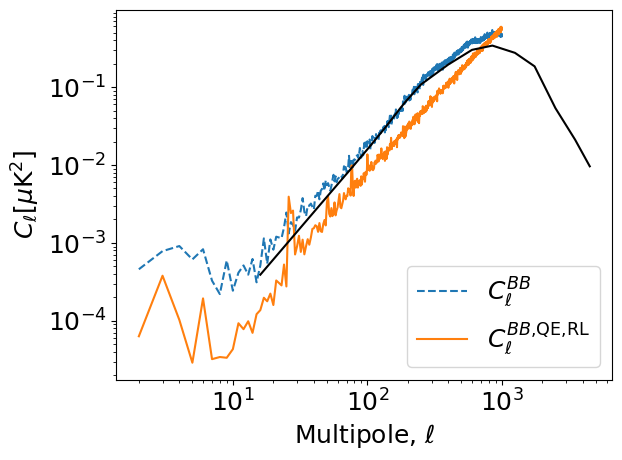

In [10]:
input_blensing = almxfl(alm_copy(ana_mwe.simulationdata.get_sim_sky(ana_mwe.simidxs[0], space='alm', spin=0, field='polarization')[1], None, *ana_mwe.lm_max_blt), ana_mwe.ttebl['e'], ana_mwe.lm_max_blt[0], inplace=False) 
blens_residual_QE = ana_mwe.get_residualblens(ana_mwe.simidxs[0], 0)

clbb = ana_mwe.read_data()

hp.mollview(hp.alm2map(input_blensing, nside=256), title='Input lensed B-map')
hp.mollview(hp.alm2map(blens_residual_QE, nside=256), title='QE delensed B-map')

plt.show()

input_cl = hp.alm2cl(input_blensing, lmax_out=1000)
resid_cl = hp.alm2cl(blens_residual_QE, lmax=1000, lmax_out=1000)

ell = np.arange(len(input_cl))[2:]


plt.loglog(ell, ell*(ell+1)*input_cl[2:], label=r'$C_\ell^{BB}$', linestyle='--')
plt.loglog(ell, ell*(ell+1)*resid_cl[2:], label=r'$C_\ell^{BB{,}{\rm QE{,}RL}}$')

plt.loglog(ana_mwe.edges_center, ana_mwe.edges_center*(ana_mwe.edges_center)*ana_mwe.ct[1:], color='black')

plt.legend(loc='lower right')
# plt.xlim(0,210)
# plt.ylim(1e-7,1e-5)
plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')

In [ ]:
from camb.correlations import lensed_cls
from plancklens import n0s, utils
from delensalot.biases import n0n1_iterative
from delensalot.core import cachers

dls_unl_true, cldd_true = dutils.cls2dls(ana_mwe.cls_unl)
llp2 = np.arange(ana_mwe.lm_max_qlm[0] + 1, dtype=float) ** 2 * np.arange(1, ana_mwe.lm_max_qlm[0] + 2, dtype=float) ** 2 / (2. * np.pi)
lmin_teb = dict({k:v for k,v in zip(['t', 'e', 'b'], ana_mwe.lmin_teb)})
Cl_del_MAP = n0s.get_N0_iter(
    qe_key='p_p',
    nlev_t=ana_mwe.nlev['T'],
    nlev_p=ana_mwe.nlev['P'],
    beam_fwhm=ana_mwe.beam,
    cls_unl_fid=ana_mwe.cls_unl,
    lmin_cmb=lmin_teb,
    lmax_cmb=ana_mwe.lm_max_ivf[0],
    itermax=ana_mwe.itmax,
    cls_unl_dat=None,
    lmax_qlm=ana_mwe.lm_max_qlm[0],
    ret_delcls=True)[-1][-1]['bb'][30:200]

def get_N0_N1_iter(itermax, version="wE"):
    N0N1_config = (ana_mwe.nlev['T'],ana_mwe.nlev['P'],ana_mwe.beam,ana_mwe.lmin_teb,ana_mwe.lm_max_ivf[0],ana_mwe.lm_max_qlm[0])
    cacher_param = cachers.cacher_npy(opj(ana_mwe.TEMP, "N0N1"))
    iterbiases = n0n1_iterative.polMAPbiases(
        N0N1_config, fidcls_unl=ana_mwe.cls_unl, itrmax=itermax, cacher=cacher_param)
    N0_biased, N1_biased, _, _ = iterbiases.get_n0n1(
        cls_unl_true=None, cls_noise_true=None, version=version)
    return N0_biased, N1_biased, _, _

def get_cl_plen(dls_unl_true, cldd_true, N0, N1, lmax_qlm):
    rho =  np.zeros(len(cldd_true))
    if N1 is None: N1 = np.zeros(len(cldd_true))
    rho[:lmax_qlm + 1] =  cldd_true[:lmax_qlm + 1] * utils.cli(cldd_true[:lmax_qlm + 1] + llp2 * (N0[:lmax_qlm+1] + N1[:lmax_qlm + 1]))
    cpp_del = cldd_true * (1 - rho)
    return dutils.dls2cls(lensed_cls(dls_unl_true, cpp_del))

N0_QE, N1_QE, _, _ = get_N0_N1_iter(0)
N0_MAP, N1_MAP, _, _ = get_N0_N1_iter(ana_mwe.itmax)

cl_del_QE = get_cl_plen(dls_unl_true, cldd_true, N0_QE, N1_QE, ana_mwe.lm_max_qlm[0])

Seeing lmin's:
t: 2
e: 2
b: 200
 [00:00:46]  -------> 75%


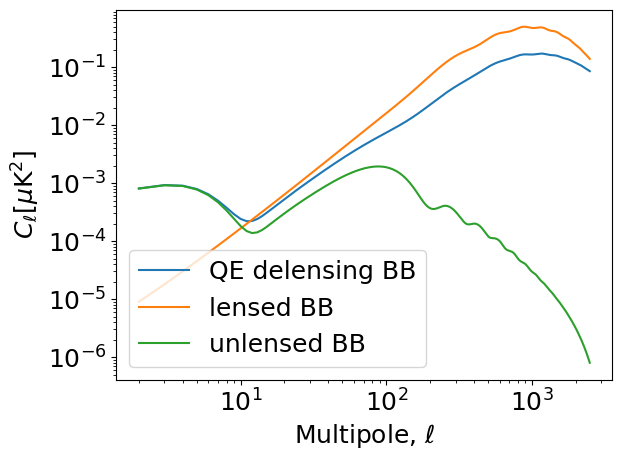

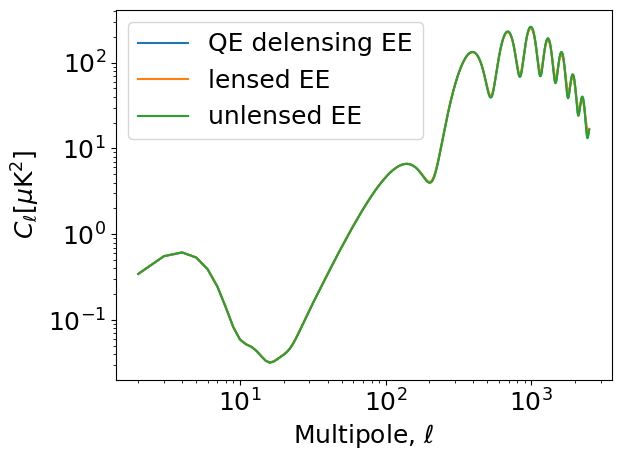

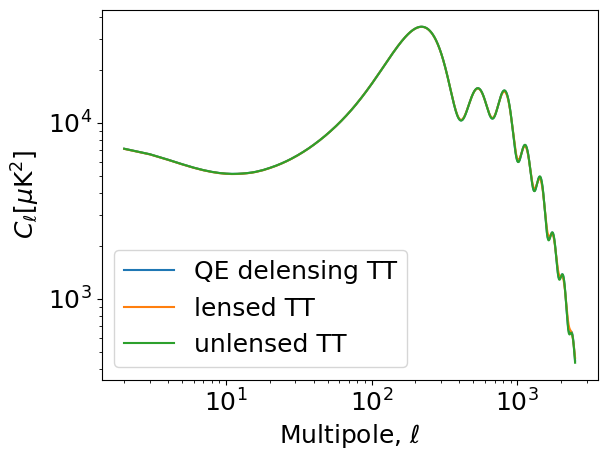

In [27]:
ell = np.arange(2, 2500)
plt.loglog(ell, ell*(ell+1)*cl_del_QE['bb'][ell], label='QE delensing BB')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_len['bb'][ell], label='lensed BB')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_unl['bb'][ell], label='unlensed BB')

plt.legend(loc='best')

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.show()

ell = np.arange(2, 2500)
plt.loglog(ell, ell*(ell+1)*cl_del_QE['ee'][ell], label='QE delensing EE')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_len['ee'][ell], label='lensed EE')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_unl['ee'][ell], label='unlensed EE')

plt.legend(loc='best')

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.show()

ell = np.arange(2, 2500)
plt.loglog(ell, ell*(ell+1)*cl_del_QE['tt'][ell], label='QE delensing TT')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_len['tt'][ell], label='lensed TT')
plt.loglog(ell, ell*(ell+1)*ana_mwe.cls_unl['tt'][ell], label='unlensed TT')

plt.legend(loc='best')

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.show()